In [34]:
from figure_setup import configure_seaborn
configure_seaborn()

# Pour les figures du papier, il n'y a pas besoin d'afficher le titre des figures car cela est fait dans la caption 
display_titles = True

# NAS

In [35]:
import os
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("..")

## 1. NATS-Bench-Topology

/home/lam/anaconda3/envs/ntk/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Plot saved as 'nb201_log_lambda_vs_acc_tss.pdf'.


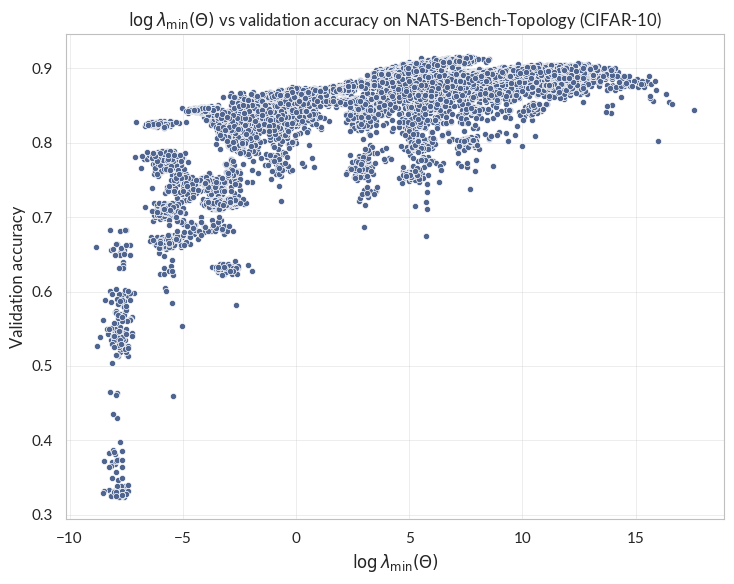

In [36]:
mode = "tss"
df = pd.read_csv(f"../results/nas/nas_{mode}_history.csv")

# plt.scatter(np.log(df['score']), df['accuracy'], s=10, alpha=0.7)
f, ax = plt.subplots(figsize=(7.5, 6))
df["log_score"] = np.log(df['score'])
sns.scatterplot(data=df, x="log_score", y="accuracy", ax=ax, s=20, linewidth=0.5)
plt.xlabel(r'$\log \lambda_{\min}(\Theta)$')
plt.ylabel('Validation accuracy')
if display_titles: plt.title(r'$\log \lambda_{\min}(\Theta)$' + f' vs validation accuracy on NATS-Bench-Topology (CIFAR-10)')
plt.tight_layout()
plt.savefig(f'nas/nb201_log_lambda_vs_acc_{mode}.pdf', bbox_inches='tight', format="pdf")
# plt.close()

print(f"Plot saved as 'nb201_log_lambda_vs_acc_{mode}.pdf'.")

## 2. NATS-Bench-Size

Plot saved as 'nb201_log_lambda_vs_acc_sss.pdf'.


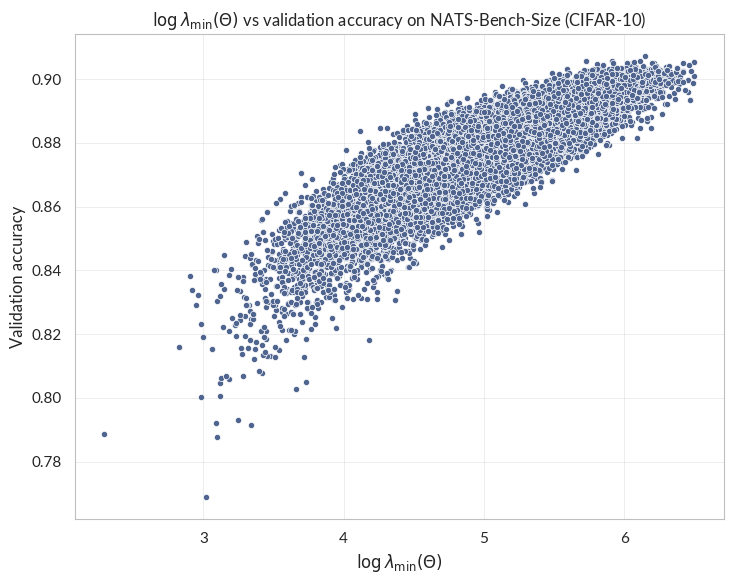

In [37]:
mode = "sss"
df = pd.read_csv(f"../results/nas/nas_{mode}_history.csv")

# plt.scatter(np.log(df['score']), df['accuracy'], s=10, alpha=0.7)
f, ax = plt.subplots(figsize=(7.5, 6))
df["log_score"] = np.log(df['score'])
sns.scatterplot(data=df, x="log_score", y="accuracy", ax=ax, s=20, linewidth=0.5)
plt.xlabel(r'$\log \lambda_{\min}(\Theta)$')
plt.ylabel('Validation accuracy')
if display_titles: plt.title(r'$\log \lambda_{\min}(\Theta)$' + f' vs validation accuracy on NATS-Bench-Size (CIFAR-10)')
plt.tight_layout()
plt.savefig(f'nas/nb201_log_lambda_vs_acc_{mode}.pdf', bbox_inches='tight', format="pdf")
# plt.close()

print(f"Plot saved as 'nb201_log_lambda_vs_acc_{mode}.pdf'.")

# NTK is Constant during training

## Boston Fully Connected

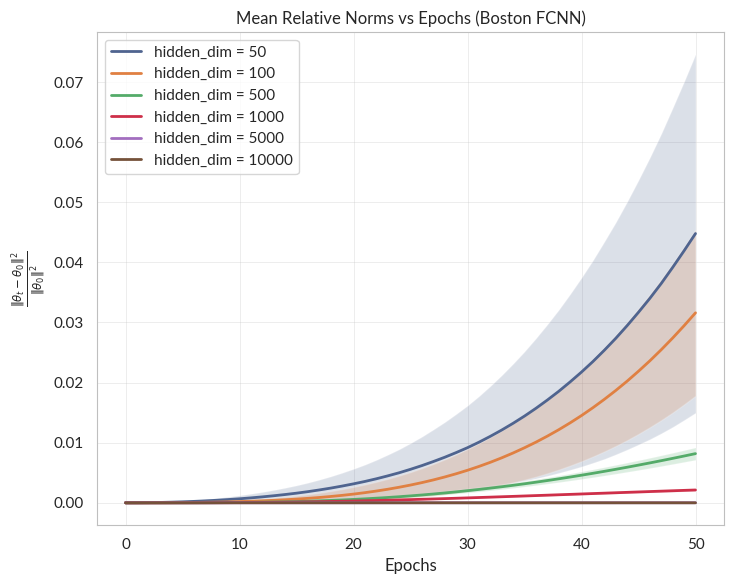

In [38]:
df = pd.read_csv(f"../results/constant/boston_results.csv")
f, ax = plt.subplots(figsize=(7.5, 6))
# First, we need to process the rel_norms column (convert from string to list)
df['rel_norms'] = df['rel_norms'].apply(eval)

# Aggregate by out_channels and compute mean over iterations
grouped = df.groupby('hidden_dim')['rel_norms'].apply(lambda x: np.mean(np.array(x.tolist()), axis=0))

# Plot lines for each out_channels value
for out_ch in grouped.index:
    mean_rel_norms = grouped[out_ch]
    ax.plot(range(len(mean_rel_norms)), mean_rel_norms, label=f'hidden_dim = {out_ch}', linewidth=2)
    # Compute std over iterations for this out_channels value
    std_rel_norms = df[df['hidden_dim'] == out_ch]['rel_norms'].apply(lambda x: np.array(x)).values
    std_rel_norms = np.std(np.vstack(std_rel_norms), axis=0)
    ax.fill_between(range(len(mean_rel_norms)), 
                    mean_rel_norms - std_rel_norms, 
                    mean_rel_norms + std_rel_norms, 
                    alpha=0.2)

ax.set_xlabel('Epochs')
ax.set_ylabel(r'$\frac{\|\theta_t - \theta_0\|^2}{\|\theta_0\|^2}$')
if display_titles: ax.set_title('Mean Relative Norms vs Epochs (Boston FCNN)')
ax.legend()
plt.tight_layout()

## MNIST Fully Connected

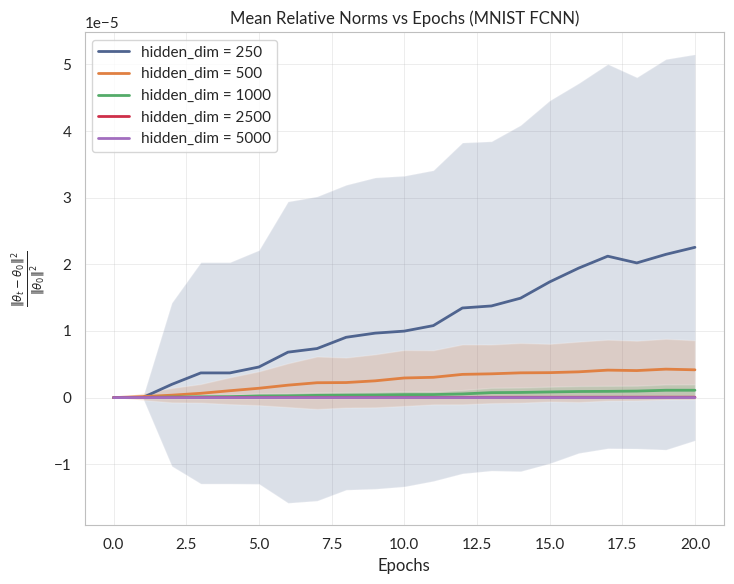

In [39]:
df = pd.read_csv(f"../results/constant/mnist_fcnn_results.csv")
f, ax = plt.subplots(figsize=(7.5, 6))
# First, we need to process the rel_norms column (convert from string to list)
df['rel_norms'] = df['rel_norms'].apply(eval)

# Aggregate by out_channels and compute mean over iterations
grouped = df.groupby('hidden_dim')['rel_norms'].apply(lambda x: np.mean(np.array(x.tolist()), axis=0))

# Plot lines for each out_channels value
for out_ch in grouped.index:
    mean_rel_norms = grouped[out_ch]
    ax.plot(range(len(mean_rel_norms)), mean_rel_norms, label=f'hidden_dim = {out_ch}', linewidth=2)
    # Compute std over iterations for this out_channels value
    std_rel_norms = df[df['hidden_dim'] == out_ch]['rel_norms'].apply(lambda x: np.array(x)).values
    std_rel_norms = np.std(np.vstack(std_rel_norms), axis=0)
    ax.fill_between(range(len(mean_rel_norms)), 
                    mean_rel_norms - std_rel_norms, 
                    mean_rel_norms + std_rel_norms, 
                    alpha=0.2)

ax.set_xlabel('Epochs')
ax.set_ylabel(r'$\frac{\|\theta_t - \theta_0\|^2}{\|\theta_0\|^2}$')
if display_titles: ax.set_title('Mean Relative Norms vs Epochs (MNIST FCNN)')
ax.legend()
plt.tight_layout()

## MNIST CNN

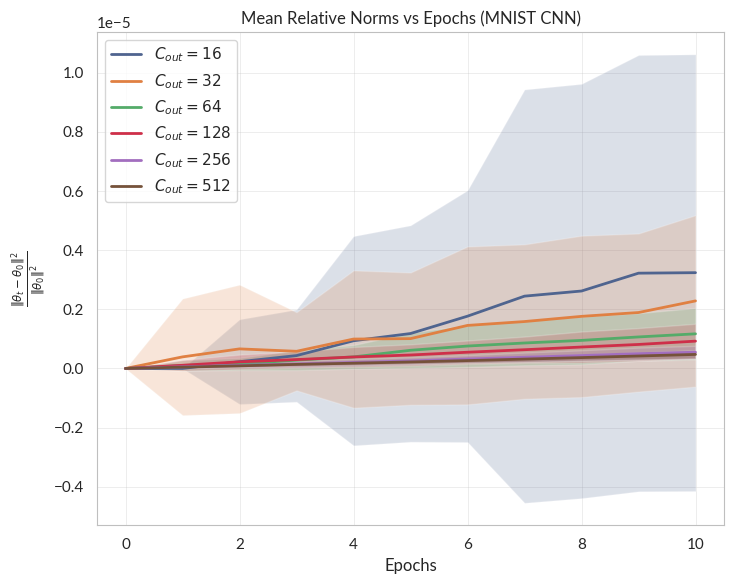

In [40]:
df = pd.read_csv(f"../results/constant/mnist_cnn_results.csv")
f, ax = plt.subplots(figsize=(7.5, 6))
# First, we need to process the rel_norms column (convert from string to list)
df['rel_norms'] = df['rel_norms'].apply(eval)

# Aggregate by out_channels and compute mean over iterations
grouped = df.groupby('out_channels')['rel_norms'].apply(lambda x: np.mean(np.array(x.tolist()), axis=0))

# Plot lines for each out_channels value
for out_ch in grouped.index:
    mean_rel_norms = grouped[out_ch]
    ax.plot(range(len(mean_rel_norms)), mean_rel_norms, label=rf'$C_{{out}} = {out_ch}$', linewidth=2)
    # Compute std over iterations for this out_channels value
    std_rel_norms = df[df['out_channels'] == out_ch]['rel_norms'].apply(lambda x: np.array(x)).values
    std_rel_norms = np.std(np.vstack(std_rel_norms), axis=0)
    ax.fill_between(range(len(mean_rel_norms)), 
                    mean_rel_norms - std_rel_norms, 
                    mean_rel_norms + std_rel_norms, 
                    alpha=0.2)

ax.set_xlabel('Epochs')
ax.set_ylabel(r'$\frac{\|\theta_t - \theta_0\|^2}{\|\theta_0\|^2}$')
if display_titles: ax.set_title('Mean Relative Norms vs Epochs (MNIST CNN)')
ax.legend()
plt.tight_layout()

## Transformer

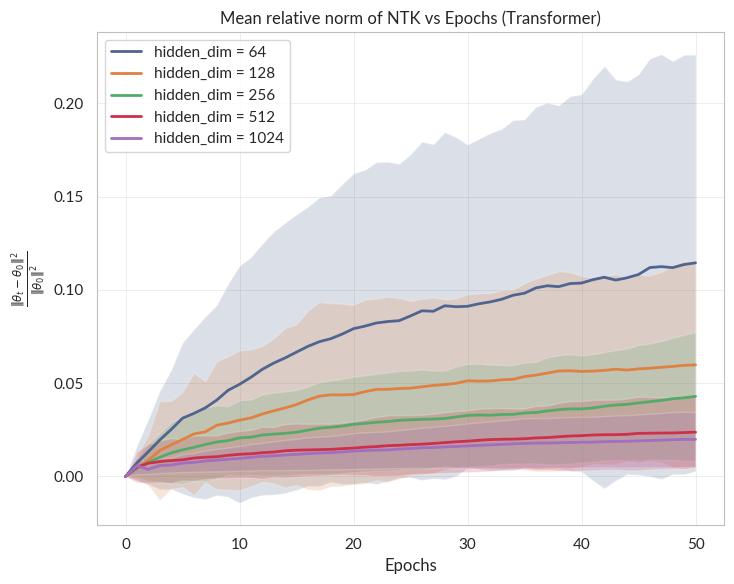

In [41]:
df = pd.read_csv(f"../results/constant/transformer_results.csv")
f, ax = plt.subplots(figsize=(7.5, 6))
# First, we need to process the rel_norms column (convert from string to list)
df['rel_norms'] = df['rel_norms'].apply(eval)

# Aggregate by out_channels and compute mean over iterations
grouped = df.groupby('hidden_dim')['rel_norms'].apply(lambda x: np.mean(np.array(x.tolist()), axis=0))

# Plot lines for each out_channels value
for out_ch in grouped.index:
    mean_rel_norms = grouped[out_ch]
    ax.plot(range(len(mean_rel_norms)), mean_rel_norms, label=f'hidden_dim = {out_ch}', linewidth=2)
    # Compute std over iterations for this out_channels value
    std_rel_norms = df[df['hidden_dim'] == out_ch]['rel_norms'].apply(lambda x: np.array(x)).values
    std_rel_norms = np.std(np.vstack(std_rel_norms), axis=0)
    ax.fill_between(range(len(mean_rel_norms)), 
                    mean_rel_norms - std_rel_norms, 
                    mean_rel_norms + std_rel_norms, 
                    alpha=0.2)

ax.set_xlabel('Epochs')
ax.set_ylabel(r'$\frac{\|\theta_t - \theta_0\|^2}{\|\theta_0\|^2}$')
if display_titles: ax.set_title('Mean relative norm of NTK vs Epochs (Transformer)')
ax.legend()
plt.tight_layout()

# NTK is deterministic at initialization

## Boston

/tmp/ipykernel_483643/2745567254.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_483643/2745567254.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


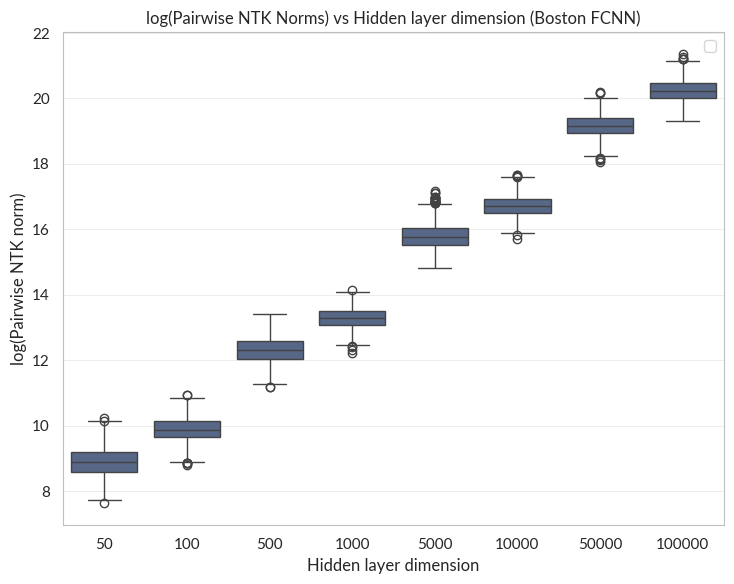

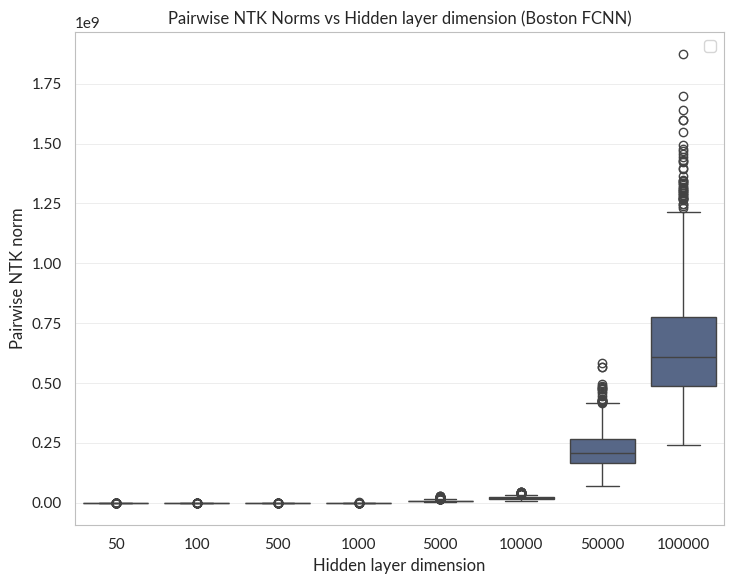

In [42]:
df = pd.read_csv(f"../results/deterministic/boston_results.csv")
f, ax = plt.subplots(figsize=(7.5, 6))
# First, we need to process the rel_norms column (convert from string to list)

df['pairwise_dists'] = df['pairwise_dists'].apply(eval)
df['log_pairwise_dists'] = df['pairwise_dists'].apply(lambda x: np.log(x))

# Create box plot
sns.boxplot(data=df.explode('log_pairwise_dists'), x='hidden_dim', y='log_pairwise_dists', ax=ax)

ax.set_xlabel('Hidden layer dimension')
ax.set_ylabel("log(Pairwise NTK norm)")
if display_titles: ax.set_title('log(Pairwise NTK Norms) vs Hidden layer dimension (Boston FCNN)')
ax.legend()
plt.tight_layout()

f2, ax2 = plt.subplots(figsize=(7.5, 6))
sns.boxplot(data=df.explode('pairwise_dists'), x='hidden_dim', y='pairwise_dists', ax=ax2)

ax2.set_xlabel('Hidden layer dimension')
ax2.set_ylabel("Pairwise NTK norm")
if display_titles: ax2.set_title('Pairwise NTK Norms vs Hidden layer dimension (Boston FCNN)')
ax2.legend()
plt.tight_layout()

## MNIST FCNN

/tmp/ipykernel_483643/1725714838.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_483643/1725714838.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


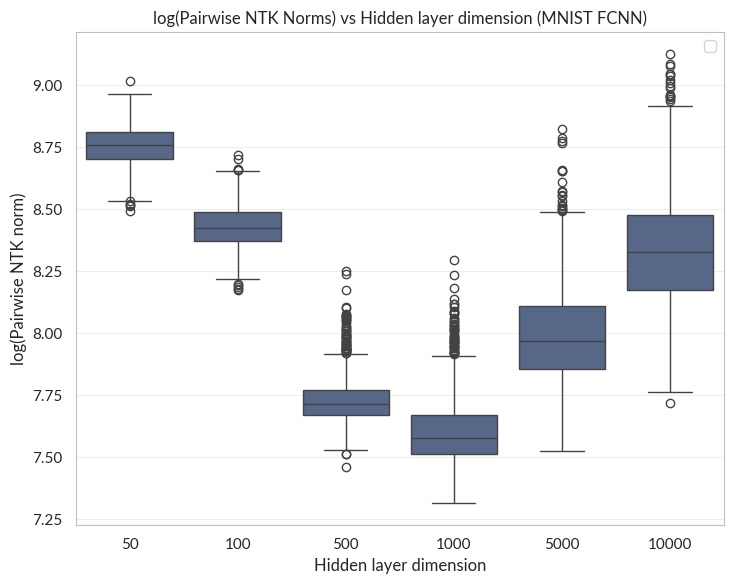

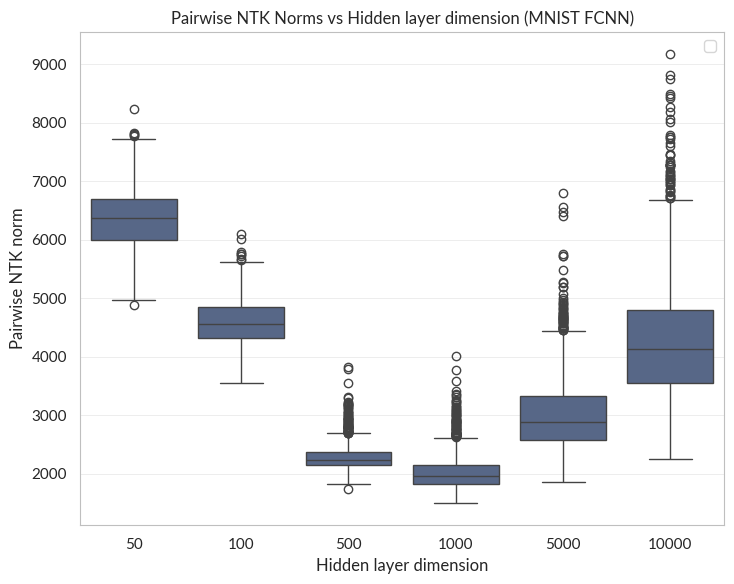

In [43]:
df = pd.read_csv(f"../results/deterministic/mnist_fcnn_results.csv")
f, ax = plt.subplots(figsize=(7.5, 6))
# First, we need to process the rel_norms column (convert from string to list)

df['pairwise_dists'] = df['pairwise_dists'].apply(eval)
df['log_pairwise_dists'] = df['pairwise_dists'].apply(lambda x: np.log(x))

# Create box plot
sns.boxplot(data=df.explode('log_pairwise_dists'), x='hidden_dim', y='log_pairwise_dists', ax=ax)

ax.set_xlabel('Hidden layer dimension')
ax.set_ylabel("log(Pairwise NTK norm)")
if display_titles: ax.set_title('log(Pairwise NTK Norms) vs Hidden layer dimension (MNIST FCNN)')
ax.legend()
plt.tight_layout()

f2, ax2 = plt.subplots(figsize=(7.5, 6))
sns.boxplot(data=df.explode('pairwise_dists'), x='hidden_dim', y='pairwise_dists', ax=ax2)

ax2.set_xlabel('Hidden layer dimension')
ax2.set_ylabel("Pairwise NTK norm")
if display_titles: ax2.set_title('Pairwise NTK Norms vs Hidden layer dimension (MNIST FCNN)')
ax2.legend()
plt.tight_layout()

## MNIST CNN 

/tmp/ipykernel_483643/2952651085.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_483643/2952651085.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


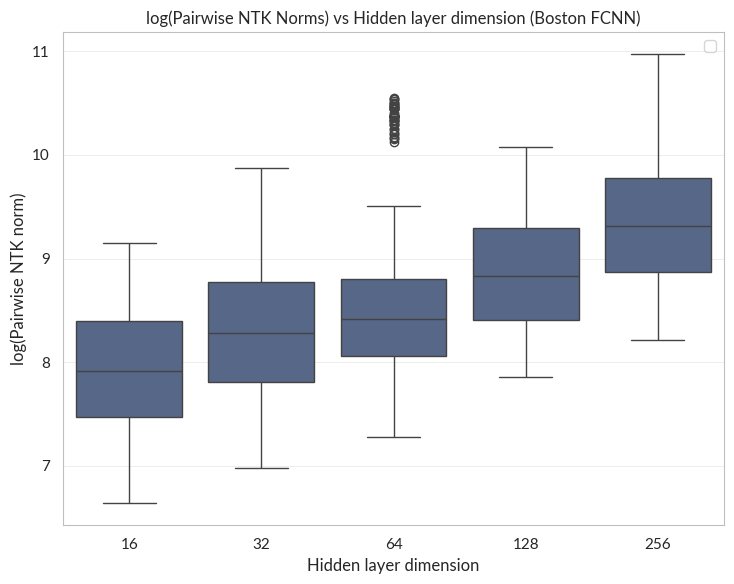

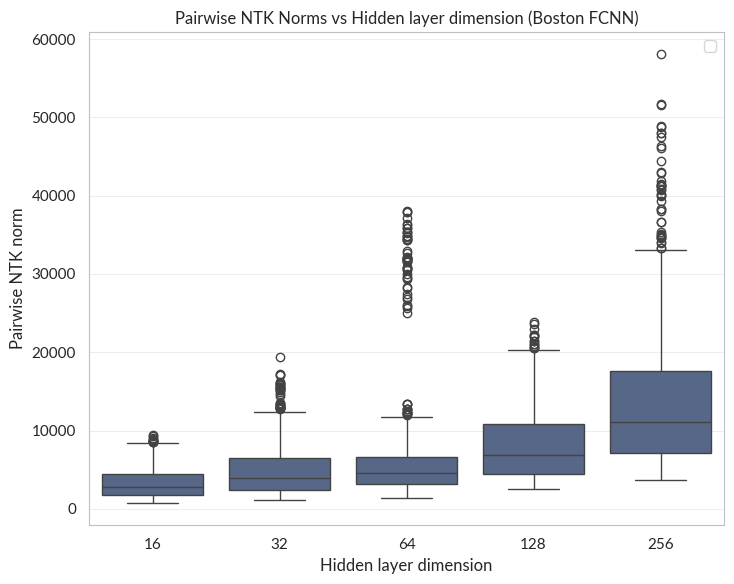

In [44]:
df = pd.read_csv(f"../results/deterministic/mnist_cnn_results.csv")
f, ax = plt.subplots(figsize=(7.5, 6))
# First, we need to process the rel_norms column (convert from string to list)

df['pairwise_dists'] = df['pairwise_dists'].apply(eval)
df['log_pairwise_dists'] = df['pairwise_dists'].apply(lambda x: np.log(x))

# Create box plot
sns.boxplot(data=df.explode('log_pairwise_dists'), x='out_channels', y='log_pairwise_dists', ax=ax)

ax.set_xlabel('Hidden layer dimension')
ax.set_ylabel("log(Pairwise NTK norm)")
if display_titles: ax.set_title('log(Pairwise NTK Norms) vs Hidden layer dimension (Boston FCNN)')
ax.legend()
plt.tight_layout()

f2, ax2 = plt.subplots(figsize=(7.5, 6))
sns.boxplot(data=df.explode('pairwise_dists'), x='out_channels', y='pairwise_dists', ax=ax2)

ax2.set_xlabel('Hidden layer dimension')
ax2.set_ylabel("Pairwise NTK norm")
if display_titles: ax2.set_title('Pairwise NTK Norms vs Hidden layer dimension (Boston FCNN)')
ax2.legend()
plt.tight_layout()

## Transformer

/tmp/ipykernel_483643/612883053.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_483643/612883053.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


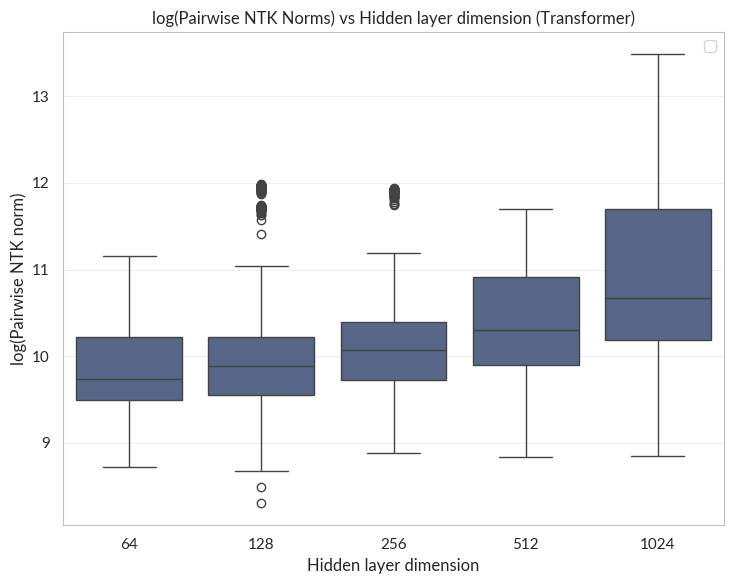

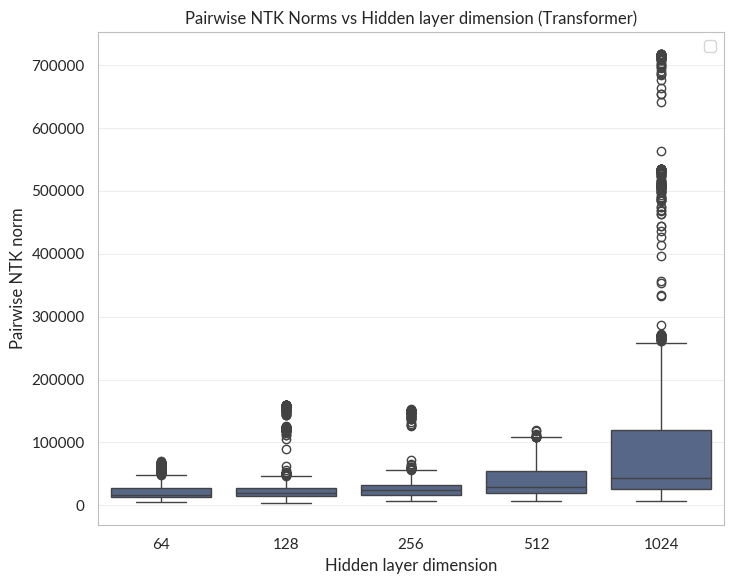

In [45]:
df = pd.read_csv(f"../results/deterministic/transformer_results.csv")
f, ax = plt.subplots(figsize=(7.5, 6))
# First, we need to process the rel_norms column (convert from string to list)

df['pairwise_dists'] = df['pairwise_dists'].apply(eval)
df['log_pairwise_dists'] = df['pairwise_dists'].apply(lambda x: np.log(x))

# Create box plot
sns.boxplot(data=df.explode('log_pairwise_dists'), x='hidden_dim', y='log_pairwise_dists', ax=ax)

ax.set_xlabel('Hidden layer dimension')
ax.set_ylabel("log(Pairwise NTK norm)")
if display_titles: ax.set_title('log(Pairwise NTK Norms) vs Hidden layer dimension (Transformer)')
ax.legend()
plt.tight_layout()

f2, ax2 = plt.subplots(figsize=(7.5, 6))
sns.boxplot(data=df.explode('pairwise_dists'), x='hidden_dim', y='pairwise_dists', ax=ax2)

ax2.set_xlabel('Hidden layer dimension')
ax2.set_ylabel("Pairwise NTK norm")
if display_titles: ax2.set_title('Pairwise NTK Norms vs Hidden layer dimension (Transformer)')
ax2.legend()
plt.tight_layout()

# Loss Bound

## Boston 

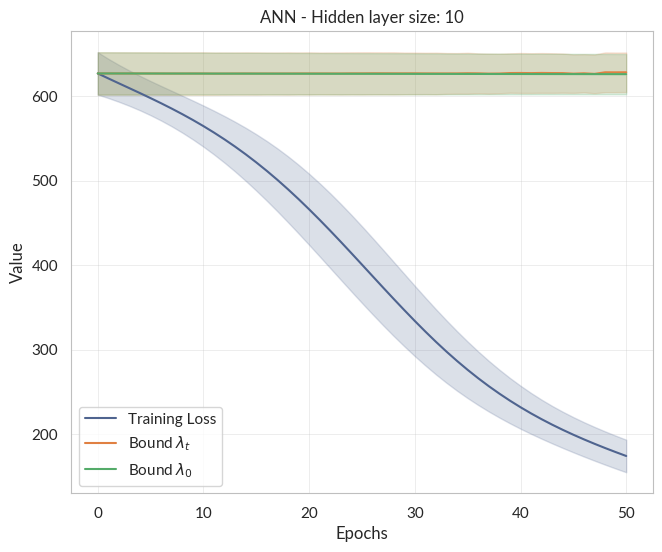

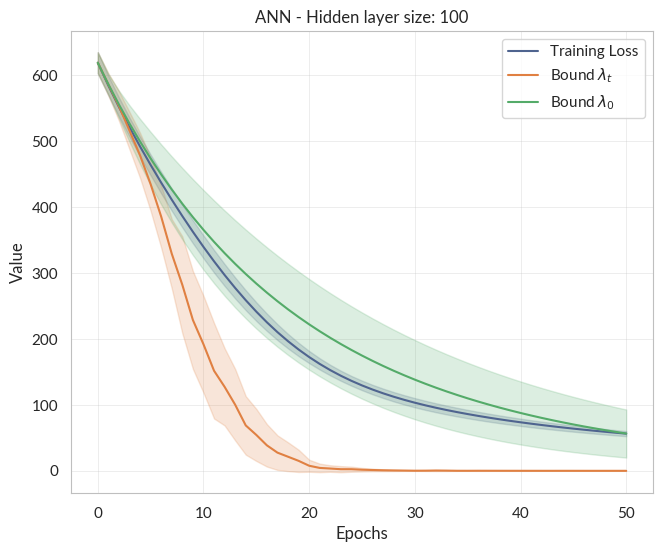

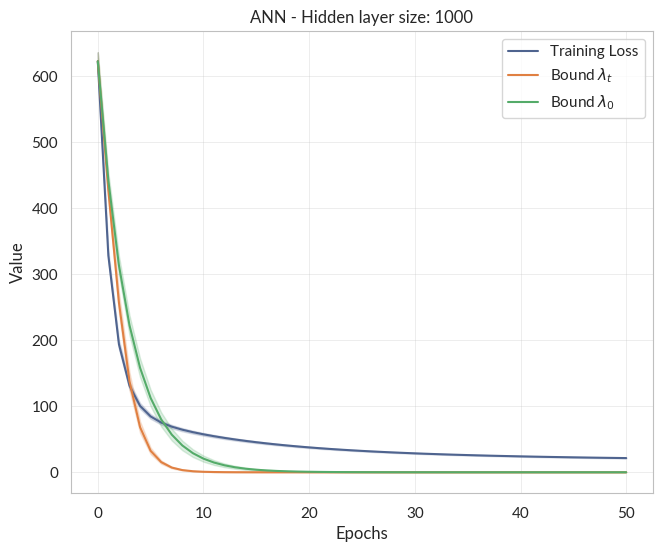

In [46]:
df = pd.read_csv(f"../results/loss_bound/boston_results.csv")
# Process the dataframe
df['losses'] = df['losses'].apply(eval)
df['borne_finie'] = df['borne_finie'].apply(eval)
df['borne_infinie'] = df['borne_infinie'].apply(eval)

# Get unique hidden dimensions
hidden_dims = df['hidden_dim'].unique()

# Create a plot for each hidden dimension
for hid_dim in hidden_dims:
    # Filter data for this hidden dimension
    df_hid = df[df['hidden_dim'] == hid_dim]
    
    # Convert lists to arrays and compute mean and std across iterations
    losses_arrays = np.array(df_hid['losses'].tolist())
    borne_finie_arrays = np.array(df_hid['borne_finie'].tolist())
    borne_infinie_arrays = np.array(df_hid['borne_infinie'].tolist())
    
    mean_loss = np.mean(losses_arrays, axis=0)
    std_loss = np.std(losses_arrays, axis=0)
    
    mean_borne_finie = np.mean(borne_finie_arrays, axis=0)
    std_borne_finie = np.std(borne_finie_arrays, axis=0)
    
    mean_borne_infinie = np.mean(borne_infinie_arrays, axis=0)
    std_borne_infinie = np.std(borne_infinie_arrays, axis=0)
    
    # Create epochs array
    epochs = np.arange(len(mean_loss))
    
    # Create figure
    f, ax = plt.subplots(1, 1, figsize=(7.5, 6))
    ax.plot(epochs, mean_loss, label='Training Loss', color=sns.color_palette()[0])
    ax.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, color=sns.color_palette()[0], alpha=0.2)
    ax.plot(epochs, mean_borne_finie, label=r"Bound $\lambda_t$", color=sns.color_palette()[1])
    ax.fill_between(epochs, mean_borne_finie - std_borne_finie, mean_borne_finie + std_borne_finie, color=sns.color_palette()[1], alpha=0.2)
    ax.plot(epochs, mean_borne_infinie, label=r"Bound $\lambda_0$", color=sns.color_palette()[2])
    ax.fill_between(epochs, mean_borne_infinie - std_borne_infinie, mean_borne_infinie + std_borne_infinie, color=sns.color_palette()[2], alpha=0.2)
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Value")
    if display_titles: ax.set_title(f"ANN - Hidden layer size: {hid_dim}")
    ax.legend()

## MNIST CNN

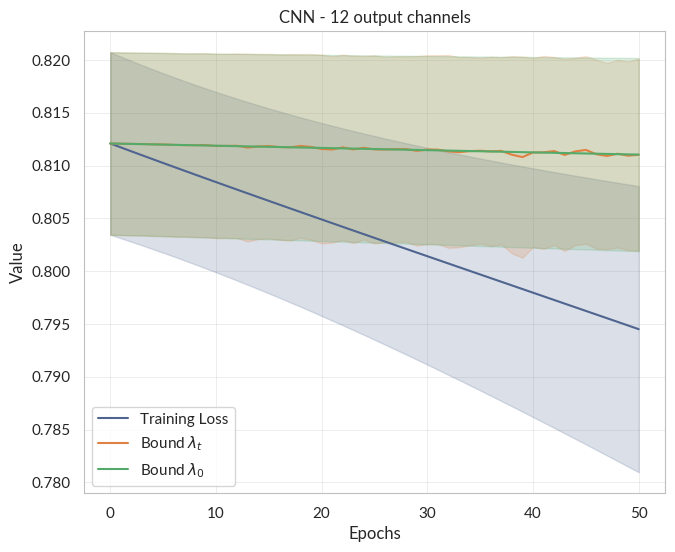

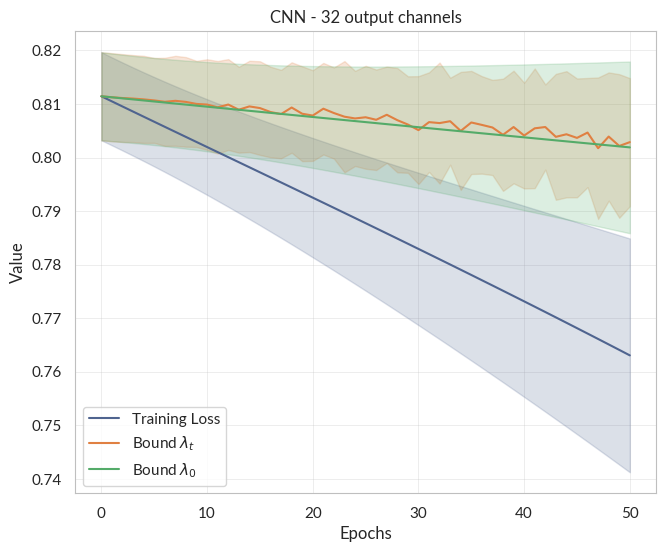

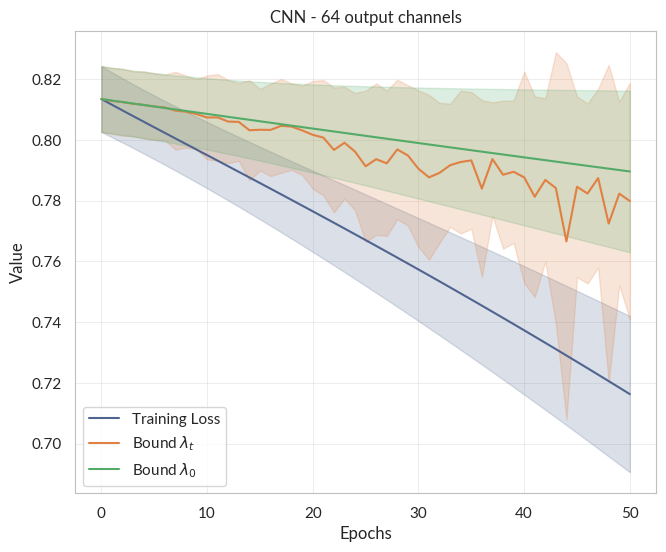

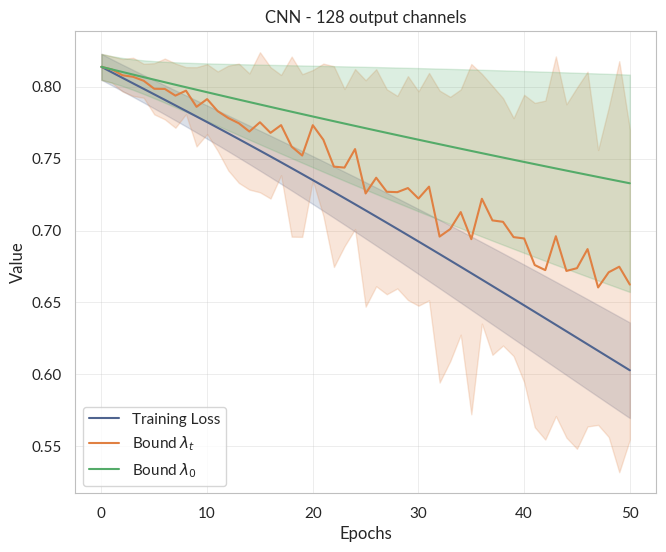

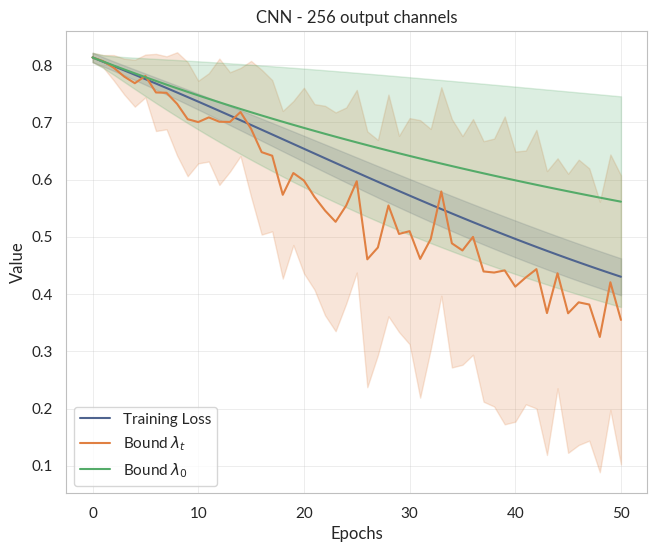

In [50]:
df = pd.read_csv(f"../results/loss_bound/cnn_results.csv")
# Process the dataframe
df['losses'] = df['losses'].apply(eval)
df['borne_finie'] = df['borne_timesteps'].apply(eval)
df['borne_infinie'] = df['borne_lambda0'].apply(eval)

# Get unique hidden dimensions
hidden_dims = df['out_channels'].unique()

# Create a plot for each hidden dimension
for hid_dim in hidden_dims:
    # Filter data for this hidden dimension
    df_hid = df[df['out_channels'] == hid_dim]
    
    # Convert lists to arrays and compute mean and std across iterations
    losses_arrays = np.array(df_hid['losses'].tolist())
    borne_finie_arrays = np.array(df_hid['borne_finie'].tolist())
    borne_infinie_arrays = np.array(df_hid['borne_infinie'].tolist())
    
    mean_loss = np.mean(losses_arrays, axis=0)
    std_loss = np.std(losses_arrays, axis=0)
    
    mean_borne_finie = np.mean(borne_finie_arrays, axis=0)
    std_borne_finie = np.std(borne_finie_arrays, axis=0)
    
    mean_borne_infinie = np.mean(borne_infinie_arrays, axis=0)
    std_borne_infinie = np.std(borne_infinie_arrays, axis=0)
    
    # Create epochs array
    epochs = np.arange(len(mean_loss))
    
    # Create figure
    f, ax = plt.subplots(1, 1, figsize=(7.5, 6))
    ax.plot(epochs, mean_loss, label='Training Loss', color=sns.color_palette()[0])
    ax.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, color=sns.color_palette()[0], alpha=0.2)
    ax.plot(epochs, mean_borne_finie, label=r"Bound $\lambda_t$", color=sns.color_palette()[1])
    ax.fill_between(epochs, mean_borne_finie - std_borne_finie, mean_borne_finie + std_borne_finie, color=sns.color_palette()[1], alpha=0.2)
    ax.plot(epochs, mean_borne_infinie, label=r"Bound $\lambda_0$", color=sns.color_palette()[2])
    ax.fill_between(epochs, mean_borne_infinie - std_borne_infinie, mean_borne_infinie + std_borne_infinie, color=sns.color_palette()[2], alpha=0.2)
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Value")
    if display_titles: ax.set_title(f"CNN - {hid_dim} output channels")
    ax.legend()

## MNIST FCNN

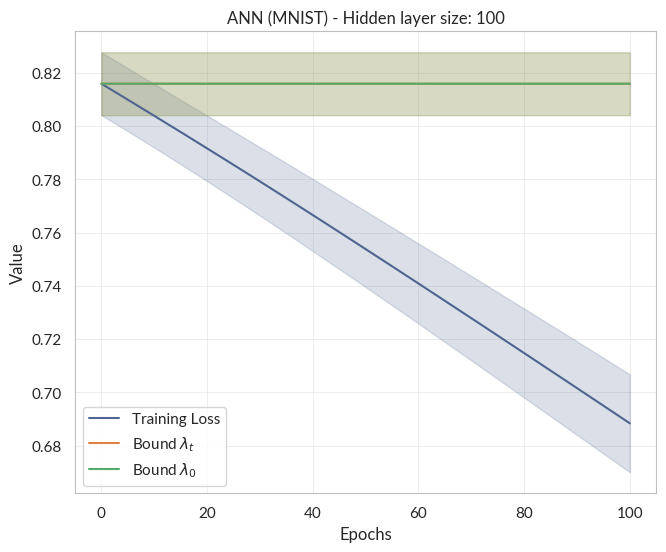

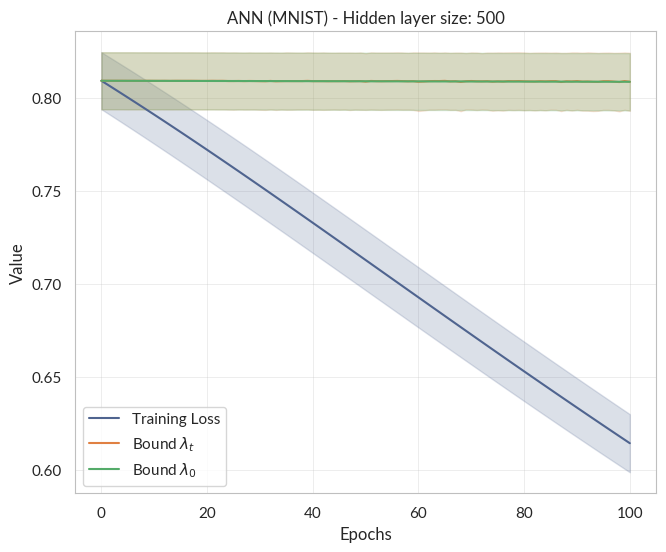

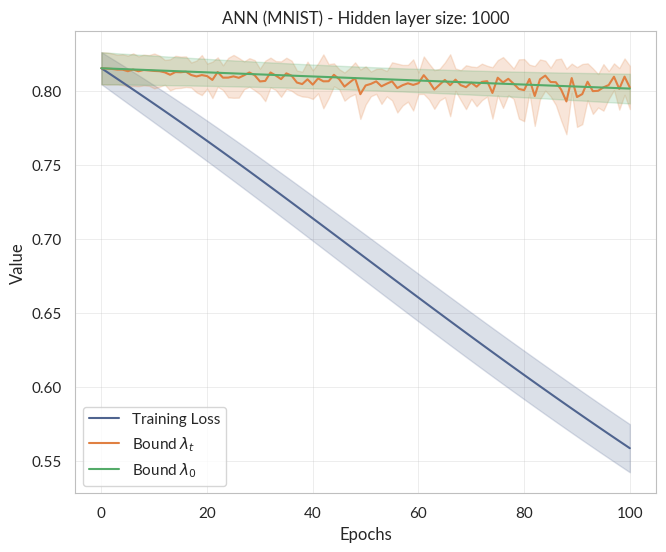

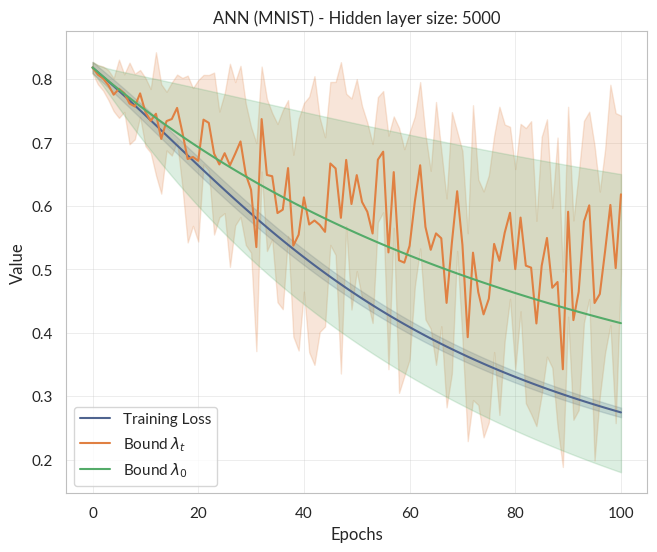

In [69]:
df = pd.read_csv(f"../results/loss_bound/fcnn_mnist_results.csv")
# Process the dataframe
df['losses'] = df['losses'].apply(eval)
df['borne_finie'] = df['borne_timesteps'].apply(eval)
df['borne_infinie'] = df['borne_lambda0'].apply(eval)

# Get unique hidden dimensions
hidden_dims = df['hidden_dim'].unique()

# Create a plot for each hidden dimension
for hid_dim in hidden_dims:
    # Filter data for this hidden dimension
    df_hid = df[df['hidden_dim'] == hid_dim]
    
    # Convert lists to arrays and compute mean and std across iterations
    losses_arrays = np.array(df_hid['losses'].tolist())
    borne_finie_arrays = np.array(df_hid['borne_finie'].tolist())
    borne_infinie_arrays = np.array(df_hid['borne_infinie'].tolist())
    
    mean_loss = np.mean(losses_arrays, axis=0)
    std_loss = np.std(losses_arrays, axis=0)
    
    mean_borne_finie = np.mean(borne_finie_arrays, axis=0)
    std_borne_finie = np.std(borne_finie_arrays, axis=0)
    
    mean_borne_infinie = np.mean(borne_infinie_arrays, axis=0)
    std_borne_infinie = np.std(borne_infinie_arrays, axis=0)
    
    # Create epochs array
    epochs = np.arange(len(mean_loss))
    
    # Create figure
    f, ax = plt.subplots(1, 1, figsize=(7.5, 6))
    ax.plot(epochs, mean_loss, label='Training Loss', color=sns.color_palette()[0])
    ax.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, color=sns.color_palette()[0], alpha=0.2)
    ax.plot(epochs, mean_borne_finie, label=r"Bound $\lambda_t$", color=sns.color_palette()[1])
    ax.fill_between(epochs, mean_borne_finie - std_borne_finie, mean_borne_finie + std_borne_finie, color=sns.color_palette()[1], alpha=0.2)
    ax.plot(epochs, mean_borne_infinie, label=r"Bound $\lambda_0$", color=sns.color_palette()[2])
    ax.fill_between(epochs, mean_borne_infinie - std_borne_infinie, mean_borne_infinie + std_borne_infinie, color=sns.color_palette()[2], alpha=0.2)
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Value")
    if display_titles: ax.set_title(f"ANN (MNIST) - Hidden layer size: {hid_dim}")
    ax.legend()

## Transformer

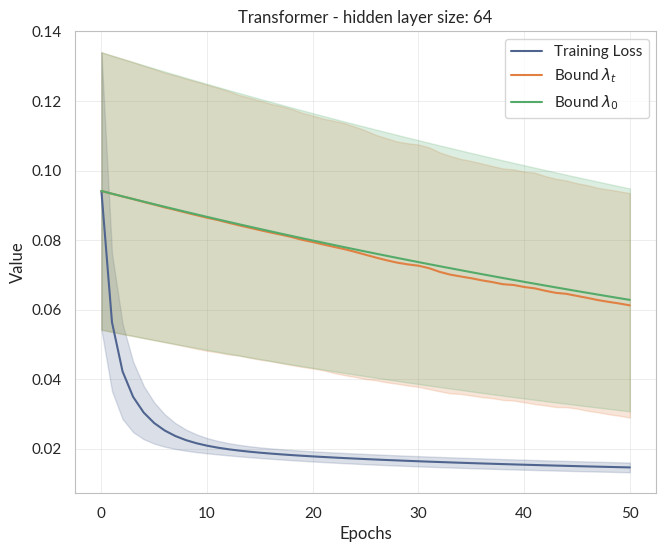

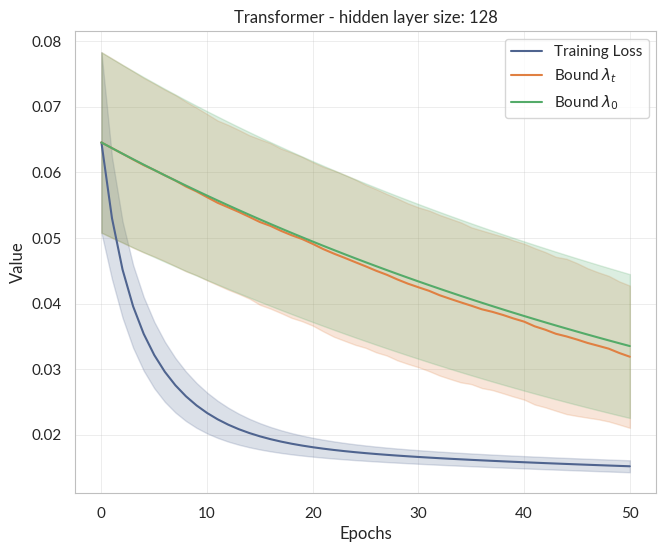

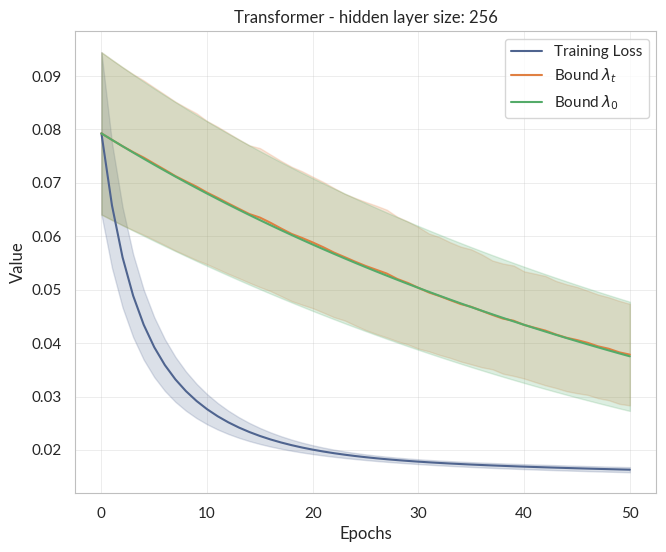

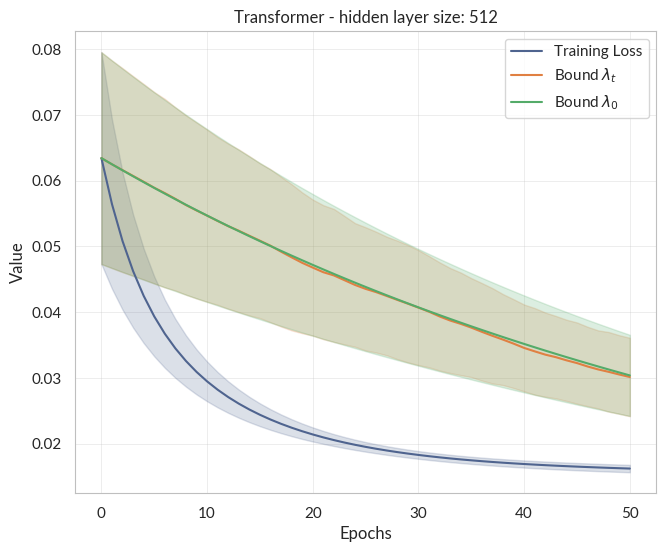

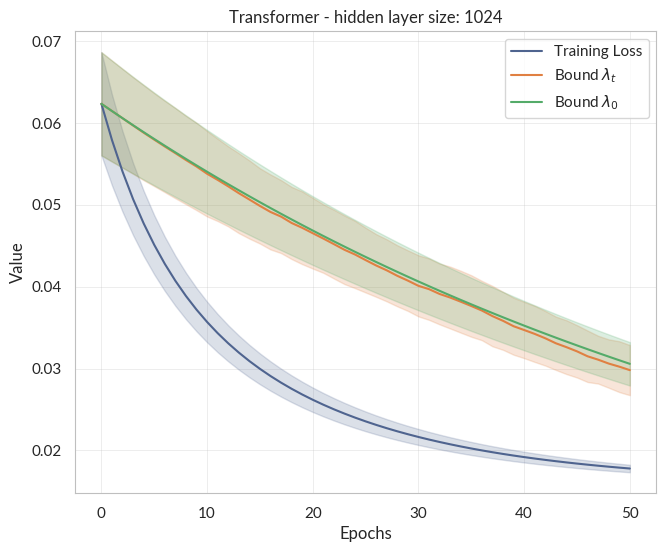

In [194]:
df = pd.read_csv(f"../results/loss_bound/transformer_results.csv")
# Process the dataframe
df['losses'] = df['losses'].apply(eval)
df['borne_finie'] = df['borne_finie'].apply(eval)
df['borne_infinie'] = df['borne_infinie'].apply(eval)

# Get unique hidden dimensions
hidden_dims = df['hidden_dim'].unique()

# Create a plot for each hidden dimension
for hid_dim in hidden_dims:
    # Filter data for this hidden dimension
    df_hid = df[df['hidden_dim'] == hid_dim]
    
    # Convert lists to arrays and compute mean and std across iterations
    losses_arrays = np.array(df_hid['losses'].tolist())
    borne_finie_arrays = np.array(df_hid['borne_finie'].tolist())
    borne_infinie_arrays = np.array(df_hid['borne_infinie'].tolist())
    
    mean_loss = np.mean(losses_arrays, axis=0)
    std_loss = np.std(losses_arrays, axis=0)
    
    mean_borne_finie = np.mean(borne_finie_arrays, axis=0)
    std_borne_finie = np.std(borne_finie_arrays, axis=0)
    
    mean_borne_infinie = np.mean(borne_infinie_arrays, axis=0)
    std_borne_infinie = np.std(borne_infinie_arrays, axis=0)
    
    # Create epochs array
    epochs = np.arange(len(mean_loss))
    
    # Create figure
    f, ax = plt.subplots(1, 1, figsize=(7.5, 6))
    ax.plot(epochs, mean_loss, label='Training Loss', color=sns.color_palette()[0])
    ax.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss, color=sns.color_palette()[0], alpha=0.2)
    ax.plot(epochs, mean_borne_finie, label=r"Bound $\lambda_t$", color=sns.color_palette()[1])
    ax.fill_between(epochs, mean_borne_finie - std_borne_finie, mean_borne_finie + std_borne_finie, color=sns.color_palette()[1], alpha=0.2)
    ax.plot(epochs, mean_borne_infinie, label=r"Bound $\lambda_0$", color=sns.color_palette()[2])
    ax.fill_between(epochs, mean_borne_infinie - std_borne_infinie, mean_borne_infinie + std_borne_infinie, color=sns.color_palette()[2], alpha=0.2)
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Value")
    if display_titles: ax.set_title(f"Transformer - hidden layer size: {hid_dim}")
    ax.legend()